## Import Dependencies

In [1]:
import pandas as pd
import csv
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.linear_model import LinearRegression
import math
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Import Dataset

In [2]:
complete = "Resources/complete_df.csv"
complete_df = pd.read_csv(complete)

## Data Analysis

In [3]:
complete_df.head()

,CountyID,AverageSalesPrice2019,AverageSalesPrice2020,Population 2019,Violent Crime Total 2019,Property Crime Total 2019,Population 2020,Violent Crime Total 2020,Property Crime Total 2020,Income_2019,Income_2020
0,26017.0,59150.0,64300.0,32793.0,271.0,654.0,32485.0,276.0,500.0,43554.0,47786.0
1,19179.0,77258.0,68800.0,24488.0,134.0,1009.0,24293.0,230.0,949.0,39576.0,42889.0
2,40137.0,77675.0,84600.0,22296.0,37.0,733.0,22226.0,42.0,895.0,44182.0,46027.0
3,51173.0,84708.0,90800.0,5593.0,24.0,224.0,5515.0,25.0,156.0,36800.0,40220.0
4,39039.0,86583.0,88100.0,16601.0,22.0,225.0,16576.0,25.0,235.0,41905.0,45385.0


In [4]:
complete_df.corr()

,CountyID,AverageSalesPrice2019,AverageSalesPrice2020,Population 2019,Violent Crime Total 2019,Property Crime Total 2019,Population 2020,Violent Crime Total 2020,Property Crime Total 2020,Income_2019,Income_2020
CountyID,1.000000,-0.211552,-0.215442,-0.029578,-0.024072,-0.033191,-0.034416,-0.024150,-0.026744,-0.047528,-0.070306
AverageSalesPrice2019,-0.211552,1.000000,0.992651,0.352306,0.325043,0.403447,0.354582,0.314959,0.391172,0.566044,0.587804
AverageSalesPrice2020,-0.215442,0.992651,1.000000,0.354861,0.329261,0.405274,0.357489,0.318643,0.392805,0.564299,0.585419
Population 2019,-0.029578,0.352306,0.354861,1.000000,0.952622,0.887779,0.993108,0.927979,0.897416,0.363551,0.365932
Violent Crime Total 2019,-0.024072,0.325043,0.329261,0.952622,1.000000,0.937680,0.944966,0.986203,0.932253,0.305726,0.308510
Property Crime Total 2019,-0.033191,0.403447,0.405274,0.887779,0.937680,1.000000,0.881096,0.929736,0.978880,0.297474,0.302034
Population 2020,-0.034416,0.354582,0.357489,0.993108,0.944966,0.881096,1.000000,0.936607,0.909986,0.367179,0.370139
Violent Crime Total 2020,-0.024150,0.314959,0.318643,0.927979,0.986203,0.929736,0.936607,1.000000,0.949549,0.295652,0.298273
Property Crime Total 2020,-0.026744,0.391172,0.392805,0.897416,0.932253,0.978880,0.909986,0.949549,1.000000,0.315849,0.319451
Income_2019,-0.047528,0.566044,0.564299,0.363551,0.305726,0.297474,0.367179,0.295652,0.315849,1.000000,0.996504


##### The feature 'CountyID' is irrelevant so the column is dropped

In [5]:
complete_df = complete_df.drop('CountyID', axis=1)

In [6]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AverageSalesPrice2019      764 non-null    float64
 1   AverageSalesPrice2020      764 non-null    float64
 2   Population 2019            764 non-null    float64
 3   Violent Crime Total 2019   764 non-null    float64
 4   Property Crime Total 2019  764 non-null    float64
 5   Population 2020            764 non-null    float64
 6   Violent Crime Total 2020   764 non-null    float64
 7   Property Crime Total 2020  764 non-null    float64
 8   Income_2019                764 non-null    float64
 9   Income_2020                764 non-null    float64
dtypes: float64(10)
memory usage: 59.8 KB


#### Heatmap

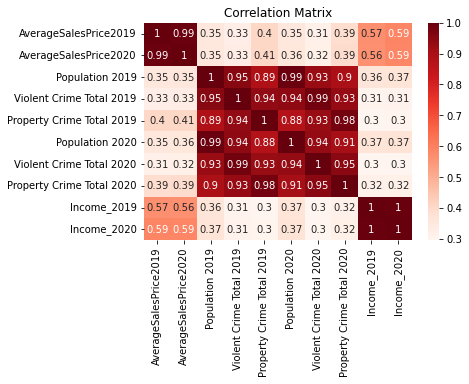

In [7]:
sns.heatmap(complete_df.corr(), annot=True, cmap='Reds');
plt.title('Correlation Matrix');

### Results
__Variables in decreasing correlation order__:
<br>
1) AverageSalesPrice2019
<br>
2) Income_2020
<br>
3) Income_2019
<br>
4) Property Crime Total 2019
<br>
5) Property Crime Total 2020
<br>
6) Population 2020
<br>
7) Population 2019
<br>
8) Violent Crime Total 2019
<br>
9) Violent Crime Total 2020

## Linear Regression Model

### __Features in this model:__
__AverageSalesPrice2019:__ Average median house sales price in various USA counties in 2019
<br>
__AverageSalesPrice2020:__ Average median house sales price in various USA counties in 2020
<br>
__Population 2019:__ Population in various USA counties in 2019
<br>
__Violent Crime Total 2019:__ Total amount of violent crimes in various USA counties in 2019
<br>
__Property Crime Total 2019:__ Total amount of property crimes in various USA counties in 2019
<br>
__Population 2020:__ Population in various USA counties in 2020
<br>
__Violent Crime Total 2020:__ Total amount of violent crimes in various USA counties in 2020
<br>
__Property Crime Total 2020:__ Total amount of property crimes in various USA counties in 2020
<br>
__Income_2019:__ Average median household income in various USA counties in 2019
<br>
__Income_2020:__ Average median household income in various USA counties in 2020

### Single Feature

#### AverageSalesPrice2020 and Income_2020

In [8]:
X = np.array(complete_df['Income_2020'])
X = X.reshape((-1,1))
Y = np.array(complete_df['AverageSalesPrice2020'])

In [9]:
model = LinearRegression().fit(X, Y)

In [10]:
Y_pred = model.predict(X)

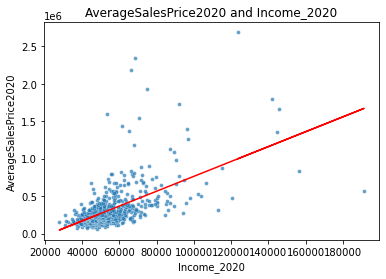

In [11]:
sns.scatterplot(data=complete_df,x='Income_2020', y='AverageSalesPrice2020', alpha=0.7, s=15)
plt.plot(X, Y_pred, color='r')
plt.title('AverageSalesPrice2020 and Income_2020');

In [12]:
print('Mean Squared Error =',math.sqrt(metrics.mean_squared_error(Y, Y_pred)))

Mean Squared Error = 208923.60614757528


#### AverageSalesPrice2020 and Property Crime Total 2019

In [13]:
X = np.array(complete_df['Property Crime Total 2019'])
X = X.reshape((-1,1))
Y = np.array(complete_df['AverageSalesPrice2020'])

In [14]:
model = LinearRegression().fit(X, Y)

In [15]:
Y_pred = model.predict(X)

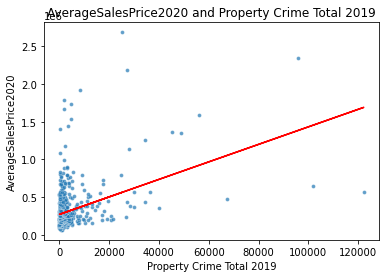

In [16]:
sns.scatterplot(data=complete_df,x='Property Crime Total 2019', y='AverageSalesPrice2020', alpha=0.7, s=15)
plt.plot(X, Y_pred, color='r')
plt.title('AverageSalesPrice2020 and Property Crime Total 2019');

In [17]:
print('Mean Squared Error =',math.sqrt(metrics.mean_squared_error(Y, Y_pred)))

Mean Squared Error = 235586.10728270662


#### AverageSalesPrice2020 and Population 2020

In [18]:
X = np.array(complete_df['Population 2020'])
X = X.reshape((-1,1))
Y = np.array(complete_df['AverageSalesPrice2020'])

In [19]:
model = LinearRegression().fit(X, Y)

In [20]:
Y_pred = model.predict(X)

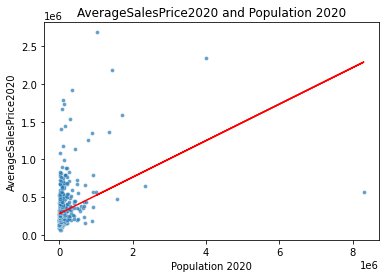

In [21]:
sns.scatterplot(data=complete_df,x='Population 2020', y='AverageSalesPrice2020', alpha=0.7, s=15)
plt.plot(X, Y_pred, color='r')
plt.title('AverageSalesPrice2020 and Population 2020');

In [22]:
print('Mean Squared Error =',math.sqrt(metrics.mean_squared_error(Y, Y_pred)))

Mean Squared Error = 240668.50674309436


### Multiple Features

In [23]:
X = np.array(complete_df[['AverageSalesPrice2019','Population 2019','Violent Crime Total 2019','Property Crime Total 2019','Population 2020','Violent Crime Total 2020','Property Crime Total 2020','Income_2019','Income_2020']])
Y = np.array(complete_df['AverageSalesPrice2020'])

In [24]:
model = LinearRegression().fit(X, Y)

In [25]:
Y_pred = model.predict(X)
print(Y_pred.shape)

(764,)


In [26]:
print(model.intercept_)

20987.537805024185


In [27]:
score = model.score(X, Y)
print(f"R2 Score: {score}")

R2 Score: 0.985696805957734


#### The R2 score indicates the observed data is a good fit of the model

In [28]:
print('Mean Squared Error =',math.sqrt(metrics.mean_squared_error(Y, Y_pred)))

Mean Squared Error = 30819.620168700414


### Model Improvement

In [29]:
scaler = StandardScaler()
scaler.fit(complete_df)
scaled_X = scaler.transform(complete_df)
Y = np.array(complete_df['AverageSalesPrice2020'])

In [30]:
model = LinearRegression().fit(scaled_X, Y)

In [31]:
Y_pred = model.predict(scaled_X)

In [32]:
print('Mean Squared Error =',math.sqrt(metrics.mean_squared_error(Y, Y_pred)))

Mean Squared Error = 1.3758903625793138e-10


#### Mean Squared Error is significantly reduced

### Test Data

In [33]:
X = np.array(complete_df)
Y = np.array(complete_df['AverageSalesPrice2020'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.5)

In [34]:
model = LinearRegression().fit(X_train, Y_train)

In [35]:
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

In [36]:
print('Mean Squared Training Error =',math.sqrt(metrics.mean_squared_error(Y_train, Y_train_pred)))
print('Mean Squared Testing Error =',math.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred)))

Mean Squared Training Error = 6.435214374469442e-10
Mean Squared Testing Error = 4.927892467055031e-10
